# 3D Dissolved Oxygen Plotting

Shallow profilers on the cabled array oscillate up and down via a winch, collecting data along the way. If one were to plot such a profiler's depth over time during a sufficiently long time period, we would see a solid rectangle. By color-coding this x-y relationship with a third datatype (salinity, dissolved oxygen, etc.) we can produce a striking water-column profile of important chemical properties of the site. Also notable is how color coding can let us convey three-dimensions of information on a 2D plot.

In [1]:
# Some Python utility code
from pathlib import Path
home = str(Path.home()) + '/'
data = home + 'data/'             # A non-repository location for datasets of interest

def dirobj(obj): return [x for x in dir(obj) if not x.startswith('__')]

def lsal(path=''):
    import os
    return os.popen('ls -al ' + path).readlines()

def ShowGitHubImage(username, repo, folder, source, localcopyname, width, height):
    import requests, shutil
    from PIL import Image
    outf = home + localcopyname
    f = 'https://raw.githubusercontent.com/' + username + '/' + repo + '/master/' + folder + '/' + source
    a = requests.get(f, stream = True)
    if a.status_code == 200:
        with open(outf, 'wb') as f:
            a.raw.decode_content = True
            shutil.copyfileobj(a.raw, f)
    return Image.open(outf).resize((width,height),Image.ANTIALIAS)

def ShowLocalImage(pathfromhome, filename, width, height):
    import shutil
    from PIL import Image
    global home
    f = home + '/' + pathfromhome + '/' + filename 
    return Image.open(f).resize((width,height),Image.ANTIALIAS)

# Test either of the 'Show Image' functions
# ShowGitHubImage('robfatland', 'othermathclub', 'images/cellular', 'conus_textile_shell_2.png', 'ctextile.jpg', 450, 250)
# ShowLocalImage('.', 'ctextile.jpg', 450, 250)


### Intermezzo on timing Jupyter notebook cells

There are some 'Jupyter notebook magic' features line magic ('%') and cell magic ('%%'). 
See [this link](https://ipython.readthedocs.io/en/stable/interactive/magics.html) for more.

Let's use the 'time'
line magic to time the running of a trivial cell, as follows...

In [5]:
# the 'time' line magic prints 'how long I took to run'. If this cell has been pre-run the output 'wall time' will be 
#   a guide to the new user on how long the cell *ought* to take
%time

# try it; notice the print substitutes a space for a carriage return via the end kwarg 
for i in range(1,100): print(i,end = " ")


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

## Data Request

In [2]:
# object to interface with OOI
from yodapy.datasources import OOI

# see progress info from yodapy
import logging
logging.basicConfig(level=logging.INFO)

ooi = OOI()
# search by research array, site, and instrument name or reference designator
# functions like google searches

# everything on the profiler: http://ooi.visualocean.net/sites/view/RS01SBPS
# ooi.search(region="cabled",site="oregon slope base",instrument="ctd")
# 
# Please observe: This CTD produces *4* results: temperature, salinity and dissolved oxygen w/r/t depth
#
ooi.search(region="cabled",site="oregon slope base shallow profiler",instrument="RS01SBPS-SF01A-2A-CTDPFA102")
ooi.view_instruments()

INFO:yodapy.datasources.ooi.m2m_client:Creating M2mClient instance (https://ooinet.oceanobservatories.org)


,reference_designator,name,start_depth,end_depth,current_status,preferred_stream,preferred_parameter,location
1222,RS01SBPS-SF01A-2A-CTDPFA102,CTD,5.0,200.0,,ctdpf_sbe43_sample,908,Shallow Profiler


{'RS01SBPS-SF01A-2A-CTDPFA102': [{'beginTime': '2014-10-06T22:05:23.269Z',
   'count': 97236022,
   'endTime': '2018-12-21T01:49:54.365Z',
   'method': 'streamed',
   'stream': 'ctdpf_sbe43_sample'}]}

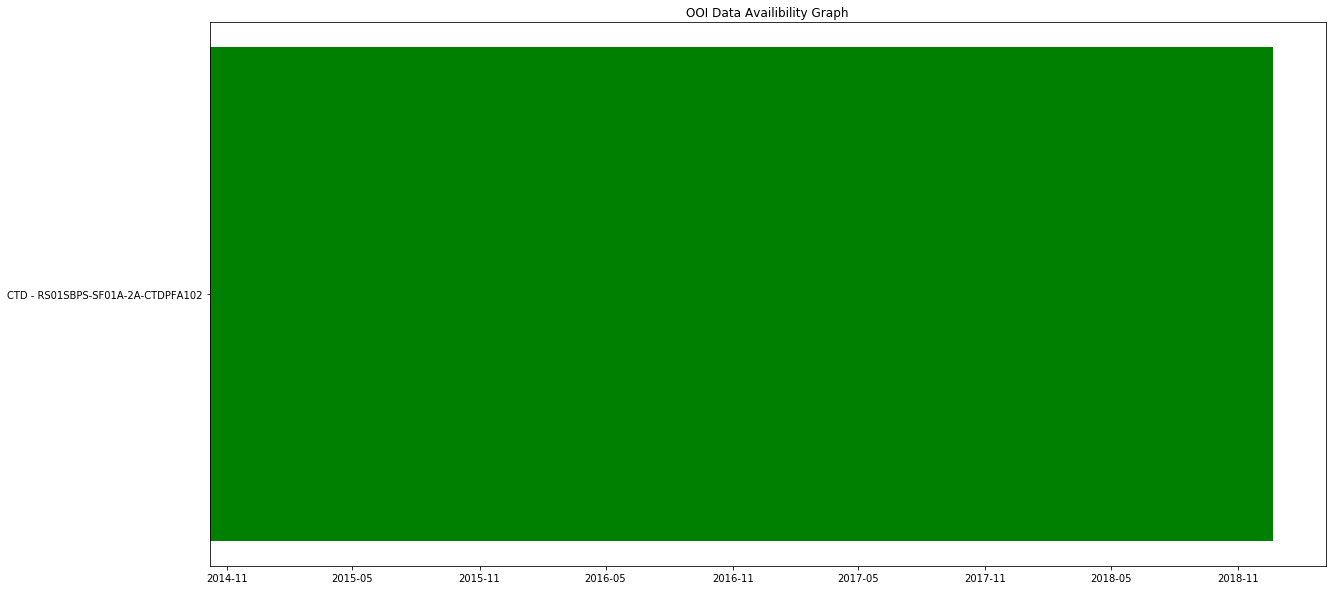

In [3]:
# notice we have dialed in (so far) to region, site and insrument
# comment out to skip viewing the data availability plot for this instrument
# The '%%' syntax Keenan referred to as 'magic' { line magic uses '%', cell magic uses '%%'}
#   ...see https://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline
ooi.data_availability()
# i just see a green block so the chart is not particularly helpful

In [6]:
%time
begin = "2017-01-01"
end = "2017-03-01"
asset = ooi.request_data(begin_date = begin, end_date = end, data_type = "netcdf")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


INFO:yodapy.datasources.ooi:Requesting data ...
INFO:yodapy.datasources.ooi:Data request complete, please wait for data to be compiled ...


In [8]:
# Print this to see the data compile in real time
# asset.raw()[0]["allURLs"]

# ...or in automated fashion: This took a minute or two on Dec 20 2018
import time
while not ooi.check_status(): time.sleep(5)
print("Request complete!")

INFO:yodapy.datasources.ooi:Request (https://opendap.oceanobservatories.org/async_results/rob5@uw.edu/20181221T015615-RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample) completed.


Request complete!


In [9]:
# dirobj(ooi)
ooi.view_instruments()

,reference_designator,name,start_depth,end_depth,current_status,preferred_stream,preferred_parameter,location
1222,RS01SBPS-SF01A-2A-CTDPFA102,CTD,5.0,200.0,,ctdpf_sbe43_sample,908,Shallow Profiler


In [10]:
dirobj(asset)

['_check_data_status',
 '_client',
 '_data_streams',
 '_data_type',
 '_data_urls',
 '_end_date',
 '_filtered_instruments',
 '_instruments',
 '_logger',
 '_perform_check',
 '_regions',
 '_retrieve_availibility',
 '_session',
 '_sites',
 '_source_name',
 '_start_date',
 '_streams_descriptions',
 'check_status',
 'clear',
 'data_availability',
 'download_ncfiles',
 'end_date',
 'last_request_urls',
 'raw',
 'request_data',
 'search',
 'source_name',
 'start_date',
 'to_xarray',
 'token',
 'username',
 'view_instruments',
 'view_regions',
 'view_sites']

In [19]:
asset.view_instruments()
# we really need to move forward from this point: bootstrapping the streams, assigning those...

,reference_designator,name,start_depth,end_depth,current_status,preferred_stream,preferred_parameter,location
1222,RS01SBPS-SF01A-2A-CTDPFA102,CTD,5.0,200.0,,ctdpf_sbe43_sample,908,Shallow Profiler


In [11]:
# Now we go from an abstract 'asset' to an xarray (more tangible!... but we do need to understand what happens here)
%time
x=asset.to_xarray()
x

INFO:yodapy.datasources.ooi:Request (https://opendap.oceanobservatories.org/async_results/rob5@uw.edu/20181221T015615-RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample) completed.
INFO:yodapy.datasources.ooi:Acquiring data from opendap urls ...


[<xarray.Dataset>
 Dimensions:                                 (time: 2400702)
 Coordinates:
     obs                                     (time) int32 0 1 2 3 4 5 6 7 8 9 ...
   * time                                    (time) float64 3.692e+09 ...
     seawater_pressure                       (time) float64 dask.array<shape=(2400702,), chunksize=(2400702,)>
     lat                                     (time) float64 dask.array<shape=(2400702,), chunksize=(2400702,)>
     lon                                     (time) float64 dask.array<shape=(2400702,), chunksize=(2400702,)>
 Data variables:
     deployment                              (time) int32 dask.array<shape=(2400702,), chunksize=(2400702,)>
     id                                      (time) |S64 dask.array<shape=(2400702,), chunksize=(2400702,)>
     conductivity                            (time) float64 dask.array<shape=(2400702,), chunksize=(2400702,)>
     driver_timestamp                        (time) float64 dask.array<sh

In [20]:
# This cell associates xarr (an xarray) with the completed dataset from above.
#   ooi.to_xarray() returns a list of Datasets for our instrument; in this case (with the CTD)... kilroy left off here

%time
DO = None
Time = None
Pressure = None
Temperature = None
Salinity = None
count = 0
# to_xarray() returns a list of xarray Datasets for each instruments
# since we only have one instrument, we subscript it to unwrap the data
while not (DO and Time and Pressure and Temperature and Salinity):
    xarr = asset.to_xarray()[0]
    count += 1
    if (0. not in xarr.corrected_dissolved_oxygen.values): DO = xarr.corrected_dissolved_oxygen.values
    if (0. not in xarr.seawater_pressure.values): Pressure = xarr.seawater_pressure.values
    if (0. not in xarr.time.values): Time = xarr.time.values
    if (0. not in xarr.seawater_temperature.values): Temperature = xarr.seawater_temperature.values
    if (0. not in xarr.practical_salinity.values): Salinity = xarr.practical_salinity.values
    print(DO.any(),Time.any(),Pressure.any(),Temperature.any(), Salinity.any(), count, sep=" ")
    
# this is trhowing an error on the 'while' which makes sense because i don't know how it even works

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs


INFO:yodapy.datasources.ooi:Request (https://opendap.oceanobservatories.org/async_results/rob5@uw.edu/20181221T015615-RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample) completed.
INFO:yodapy.datasources.ooi:Acquiring data from opendap urls ...


True True True True True 1


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
DO

array([110.43246454, 110.23840414, 110.38948527, ..., 261.87093591,
       261.84708291, 261.91488265])

In [22]:
Pressure

array([191.95034858, 191.95463878, 191.96000153, ...,  62.89325688,
        62.76685992,  62.69938897])

In [23]:
Time

array([3.69221760e+09, 3.69221760e+09, 3.69221760e+09, ...,
       3.69472938e+09, 3.69472938e+09, 3.69472938e+09])

In [24]:
Temperature

array([ 7.73250989,  7.73275569,  7.73263279, ..., 10.29273615,
       10.29266959, 10.29273615])

In [25]:
Salinity

array([33.92359397, 33.92295404, 33.92320398, ..., 32.75775149,
       32.75767702, 32.757772  ])

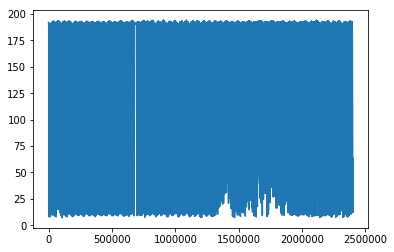

In [26]:
from matplotlib import pyplot as plt
plt.plot(Pressure)

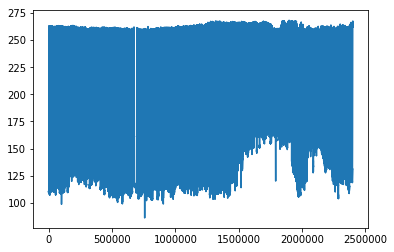

In [27]:
plt.plot(DO)

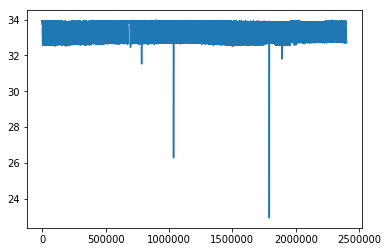

In [28]:
plt.plot(Salinity)

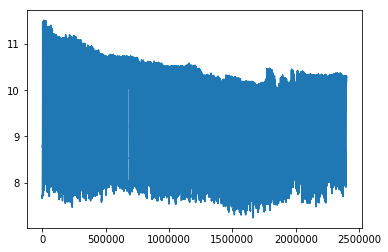

In [29]:
plt.plot(Temperature)

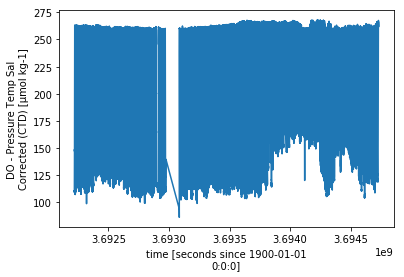

In [30]:
x[0].corrected_dissolved_oxygen.plot()

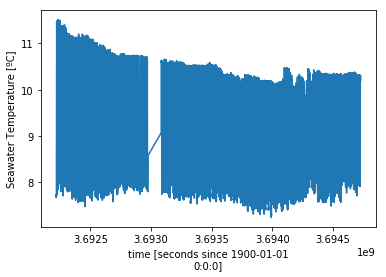

In [31]:
x[0].seawater_temperature.plot()

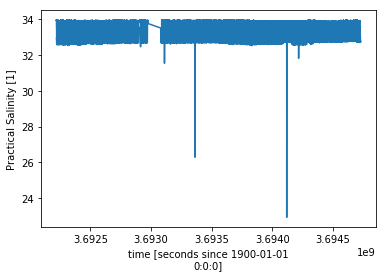

In [32]:
x[0].practical_salinity.plot()

In [33]:
# a reminder on logical evaluation of an expression...
bool(None)

False

## Filter Data

Xarray enables us to see the data without downloading it into memory. In our case, the size of the entire dataset is more than 16 GB! By filtering, we save RAM and download time.

In [15]:
# Since x is a list of (exactly one) xarray datasets I will set 'xa' to simply be that single dataset. 
# We can verify that data is sensible by taking a peek, like so. Behind the scenes this pulls the relevant data
#   from the server.

xa = x[0]
xa.seawater_pressure.values[:10]

NameError: name 'x' is not defined

In [59]:
# Now let us work towards curtain plots of DO, salinity and temperature
namesDO   = ["seawater_pressure","corrected_dissolved_oxygen"]
namesTemp = ["seawater_pressure","seawater_temperature"]
namesSal  = ["seawater_pressure","practical_salinity"]

# the chunk() call cuts the array into pieces along the time dimension for faster processing
xbDO   = xa[["time"] + namesDO].chunk(chunks={"time" : 1000})
xbTemp = xa[["time"] + namesTemp].chunk(chunks={"time" : 1000})
xbSal  = xa[["time"] + namesSal].chunk(chunks={"time" : 1000})

In [18]:
%%time
# convert netcdf to pandas data frame
# now we are actually downloading into RAM so the data are immediately to hand
frame = xb.to_dataframe()

Wall time: 23.4 s


In [19]:
# for local datasets
#import xarray as xr

#with xr.open_dataset("bigfile.nc") as d:
#    frame = d.to_dataframe()

# round pressure for later, not totally necessary right now
frame["seawater_pressure"] = frame["seawater_pressure"].round()
# redundant data slicing
frame = frame[["seawater_pressure","corrected_dissolved_oxygen"]]
print(frame.columns.values)

['seawater_pressure' 'corrected_dissolved_oxygen']


## Basic Plot

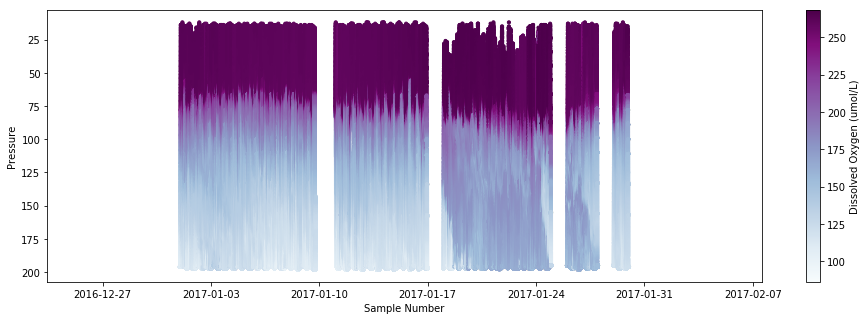

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import netCDF4  as nc

# we are dealing with 7 million points here, the larger this number, cuts down plotting time
# plotting every (step)-th point
step = 10
fig = plt.figure(figsize=(16,5))
# array slicing sugar: arr[start:stop:step]
s = plt.scatter(nc.num2date(frame.index[::step], "seconds since 1900-01-01"), # x
            frame["seawater_pressure"][::step], # y
            s=10, # thickness
            c=frame["corrected_dissolved_oxygen"][::step], # color map
            cmap=plt.get_cmap("BuPu")) # color style, see others in matplotlib docs
# invert y to show more intuitive perspective
# Remember! Pressure is a proxy for depth!
plt.gca().invert_yaxis()
plt.ylabel("Pressure")
plt.xlabel("Sample Number")
cb = plt.colorbar(s)
cb.set_label("Dissolved Oxygen (umol/L)")

In [22]:
ooi2 = OOI()

INFO:yodapy.datasources.ooi.m2m_client:Creating M2mClient instance (https://ooinet.oceanobservatories.org)


In [23]:
#lis = [list of reference designators]
#ooi2.search(region="cabled",instrument=",".join(lis))
# use the above to search for all the reference designators in the list

ooi2.search(region="cabled", instrument="RS01SBPS-SF01A-3D-SPKIRA101,RS01SBPS-SF01A-3C-PARADA101")
ooi2.view_instruments()

,reference_designator,name,start_depth,end_depth,current_status,preferred_stream,preferred_parameter,location
1227,RS01SBPS-SF01A-3C-PARADA101,Photosynthetically Available Radiation,5.0,200.0,,parad_sa_sample,192,Shallow Profiler
1228,RS01SBPS-SF01A-3D-SPKIRA101,Spectral Irradiance,5.0,200.0,,spkir_data_record,2645,Shallow Profiler


{'RS01SBPS-SF01A-3C-PARADA101': [{'stream': 'parad_sa_sample',
   'method': 'streamed',
   'count': 406026822,
   'endTime': '2018-08-10T19:28:44.198Z',
   'beginTime': '2014-10-07T20:47:48.020Z'}],
 'RS01SBPS-SF01A-3D-SPKIRA101': [{'stream': 'spkir_data_record',
   'method': 'streamed',
   'count': 356826298,
   'endTime': '2018-08-10T19:28:46.856Z',
   'beginTime': '2014-10-07T20:46:56.410Z'}]}

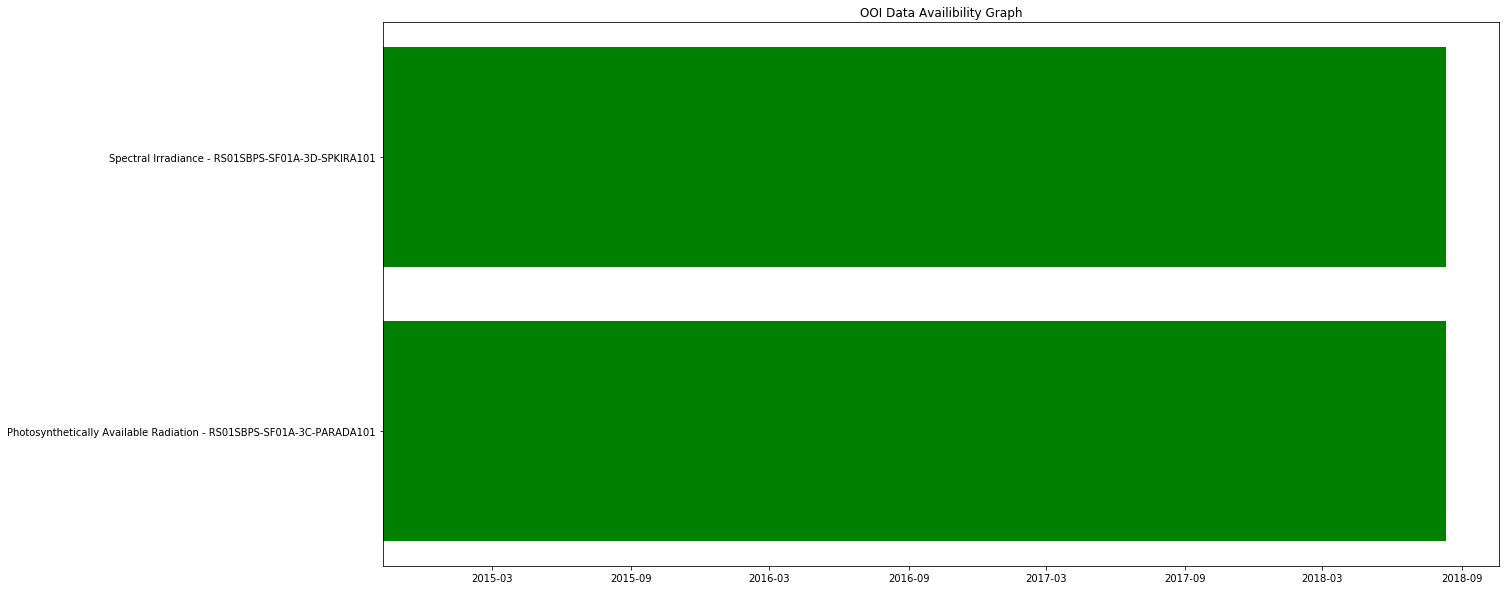

In [24]:
ooi2.data_availability()

In [26]:
ooi2.request_data(
        begin_date = "2017-01-01",
        end_date = "2017-03-01",
        data_type = "netcdf")

INFO:yodapy.datasources.ooi:Requesting data ...
INFO:yodapy.datasources.ooi:Data request complete, please wait for data to be compiled ...


<Data Source: OOI>

In [46]:
xarr2 = ooi2.to_xarray()

INFO:yodapy.datasources.ooi:Request (https://opendap.oceanobservatories.org/async_results/s-kganz@lwsd.org/20180810T192949-RS01SBPS-SF01A-3C-PARADA101-streamed-parad_sa_sample) completed.
INFO:yodapy.datasources.ooi:Request (https://opendap.oceanobservatories.org/async_results/s-kganz@lwsd.org/20180810T192958-RS01SBPS-SF01A-3D-SPKIRA101-streamed-spkir_data_record) completed.
INFO:yodapy.datasources.ooi:Acquiring data from opendap urls ...


In [47]:
xarr2[0].time.values

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
par = xarr2[0].par.values

In [49]:
par4 = par[::4]

In [52]:
l = len(par4)

In [51]:
len(xarr.time.values)

2135323

In [38]:
len(xarr.time.values)

2135323

In [60]:
xarr.time.values[:l]

array([3.69221760e+09, 3.69221760e+09, 3.69221760e+09, ...,
       3.69468599e+09, 3.69468599e+09, 3.69468599e+09])

In [67]:
ind = frame.index[:l]

In [66]:
p = frame["seawater_pressure"].values[:l]

In [84]:
from matplotlib.colors import Normalize as n

In [94]:
len(ind)

2098112

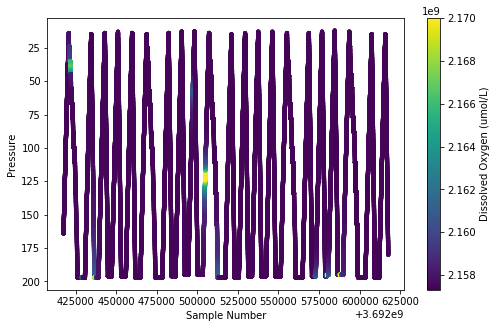

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.colors import Normalize as n
import netCDF4  as nc

# we are dealing with 7 million points here, the larger this number, cuts down plotting time
# plotting every (step)-th point
nor = n(vmax=2.17e9, vmin=min(par4))
step = 1
fig = plt.figure(figsize=(8,5))
# array slicing sugar: arr[start:stop:step]
s = plt.scatter(ind[200000:400000:step], # x
            p[200000:400000:step], # y
            s=10, # thickness
            c=par4[200000:400000:step], # color map
            cmap=plt.get_cmap("viridis"),
            norm=nor) # color style, see others in matplotlib docs
# invert y to show more intuitive perspective
# Remember! Pressure is a proxy for depth!
plt.gca().invert_yaxis()
plt.ylabel("Pressure")
plt.xlabel("Sample Number")
cb = plt.colorbar(s)
cb.set_label("Dissolved Oxygen (umol/L)")

In [71]:
ind

Float64Index([3692217600.6789804,  3692217601.679087,  3692217602.678046,
              3692217603.6777344,  3692217604.679194,  3692217605.678778,
                3692217606.67732, 3692217607.6775303,  3692217608.678781,
               3692217609.678886,
              ...
               3694685979.290562,  3694685980.290459,  3694685981.290565,
              3694685982.2908773, 3694685983.2909822,  3694685984.290983,
              3694685985.2905674,  3694685986.290984, 3694685987.2904654,
              3694685988.2904654],
             dtype='float64', name='time', length=2098112)

In [105]:
xarr2[1].spkir_downwelling_vector.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
p

array([196., 196., 196., ..., 175., 175., 175.])

In [75]:
par

array([nan, nan, nan, ..., nan, nan, nan])

In [106]:
ooi3 = OOI()
ooi3.search(region="cabled",instrument="RS01SBPS-SF01A-4A-NUTNRA101")
ooi.view_instruments()

INFO:yodapy.datasources.ooi.m2m_client:Creating M2mClient instance (https://ooinet.oceanobservatories.org)


,reference_designator,name,start_depth,end_depth,current_status,preferred_stream,preferred_parameter,location
1222,RS01SBPS-SF01A-2A-CTDPFA102,CTD,5.0,200.0,,ctdpf_sbe43_sample,908,Shallow Profiler


In [107]:
ooi3.request_data(
    begin_date = "2017-01-01",
    end_date = "2017-03-01",
    data_type = "netcdf")

INFO:yodapy.datasources.ooi:Requesting data ...
INFO:yodapy.datasources.ooi:Data request complete, please wait for data to be compiled ...


<Data Source: OOI>

In [108]:
nit = ooi3.to_xarray()[0]

INFO:yodapy.datasources.ooi:Time elapsed: 9s
INFO:yodapy.datasources.ooi:Time elapsed: 19s
INFO:yodapy.datasources.ooi:Time elapsed: 29s
INFO:yodapy.datasources.ooi:Time elapsed: 40s
INFO:yodapy.datasources.ooi:Time elapsed: 50s
INFO:yodapy.datasources.ooi:Time elapsed: 60s
INFO:yodapy.datasources.ooi:Request (https://opendap.oceanobservatories.org/async_results/s-kganz@lwsd.org/20180810T201923-RS01SBPS-SF01A-4A-NUTNRA101-streamed-nutnr_a_sample) completed.
INFO:yodapy.datasources.ooi:Acquiring data from opendap urls ...


In [110]:
nit.salinity_corrected_nitrate.values

array([28.13464018, 27.97214701, 28.11987192, ...,  4.48457675,
        4.60951852,  4.3835227 ])

In [111]:
salnit = nit.salinity_corrected_nitrate.values

In [113]:
nit.time.values

array([3.69224414e+09, 3.69224414e+09, 3.69224418e+09, ...,
       3.69471518e+09, 3.69471522e+09, 3.69471522e+09])

In [114]:
nframe = nit.to_dataframe()

In [116]:
ctdframe = xarr.to_dataframe()

In [118]:
import numpy as np

def round_dataframe(frame,precision=0):
    '''Rounds index to precision numbers after the decimal.'''
    frame.index = frame.index.to_series().apply(lambda x: np.round(x,precision))
    # remove any duplicates for instruments with sampling rate > 1Hz
    return frame[~frame.index.duplicated(keep="first")]

In [119]:
ctdframe = round_dataframe(ctdframe)

In [129]:
nindex = list(zip(*nframe.index.values))[0]

In [130]:
ctdpoints = ctdframe.loc[nindex,:]

C:\Users\ganzk\Anaconda3\envs\yodapy\lib\site-packages\pandas\core\indexing.py:870: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


In [131]:
len(ctdpoints) == len(nframe)

True

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.colors import Normalize as n
import netCDF4  as nc

# we are dealing with 7 million points here, the larger this number, cuts down plotting time
# plotting every (step)-th point
step = 1
fig = plt.figure(figsize=(8,5))
# array slicing sugar: arr[start:stop:step]
s = plt.scatter(ctdpoints.index.values, # x
            ctdpoints["seawater_pressure"], # y
            s=10, # thickness
            c=nframe["salinity_corrected_nitrate"], # color map
            cmap=plt.get_cmap("viridis"),
            norm=nor) # color style, see others in matplotlib docs
# invert y to show more intuitive perspective
# Remember! Pressure is a proxy for depth!
plt.gca().invert_yaxis()
plt.ylabel("Pressure")
plt.xlabel("Sample Number")
cb = plt.colorbar(s)
cb.set_label("Dissolved Oxygen (umol/L)")

NameError: name 'ctdpoints' is not defined

<Figure size 576x360 with 0 Axes>

Why the large white block in the middle of our data? If there is a connection issue between the profiler and the shore, the instrument will automatically stop oscillating. On rarer occasions, mechanical failure (likely the above) can cause longer outages. Fortunately, these holes are rare and do not prevent plotting the rest of the data.

## Depth Averaged

Above, we see a nice correlation between depth (synonym for pressure) and DO as we would expect. Although nice, what if there were an anomalous increase or decrease in DO at a particular depth that could harm marine life? To suss out this kind of information, we replot the data above but color-code it by comparing it to all other data points at the same depth.

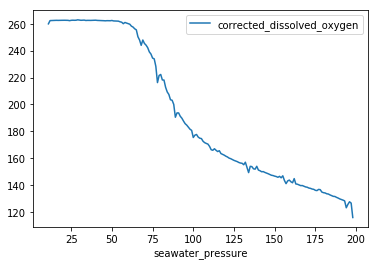

In [9]:
# group datapoints by depth and then take the mean of DO for each group
avgdo = frame.groupby("seawater_pressure").mean()["corrected_dissolved_oxygen"]
avgdo.plot(y="corrected_dissolved_oxygen",legend=True)

In [10]:
# effectively a dictionary linking pressure with DO average
avgdo[20.0]

262.6140615659565

In [11]:
%%time
# runs fairly slow, see if you can optimize it
def compute_diff(r):
    return r["corrected_dissolved_oxygen"] - avgdo[r["seawater_pressure"]]

frame2 = frame.apply(compute_diff,axis=1)

Wall time: 1min 16s


The cell below is helpful for making sure our color-coding does not bias towards either extreme by forcing pure white to align with zero variation from the mean.

In [12]:
from matplotlib.colors import Normalize as n
import numpy as np

# find largest absolute value in dataframe
maxmag = max(np.absolute(frame2))

# Note: norm is the CLASS that performs the normalization as opposed to the default generated by matplotlib
# matplotlib's occasionally makes the zero point red
norm = n(vmin = -maxmag,vmax = maxmag)

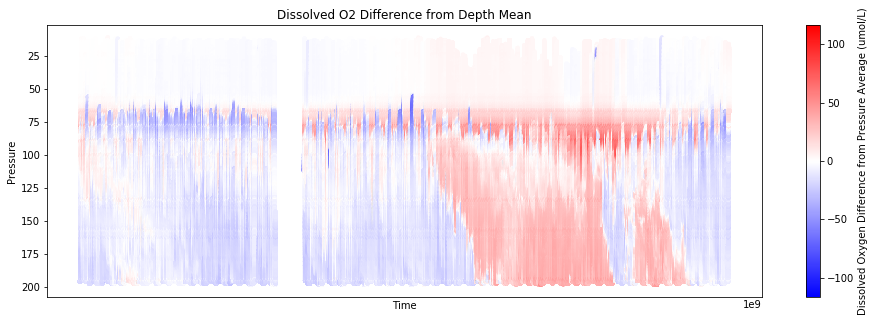

In [13]:
step = 1 # remember from before...
fig = plt.figure(figsize=(16,5))
s = plt.scatter(frame.index[::step], # x
            frame["seawater_pressure"][::step], # y
            s=10, # thickness
            c=frame2[::step], # color map
            norm=norm,
            cmap=plt.get_cmap("bwr")) # color style
plt.gca().invert_yaxis()
plt.ylabel("Pressure")
plt.xlabel("Time")
plt.title("Dissolved O2 Difference from Depth Mean")
plt.tick_params(
    axis = "x",
    which="both",
    bottom = False,
    top = False,
    labelbottom=False)
cb = plt.colorbar(s)
cb.set_label("Dissolved Oxygen Difference from Pressure Average (umol/L)")

This depth comparison reveals an interesting oxygen-rich time period towards the end of the dataset. I wonder if that's anomalous, or just a typical variation. See if you can find out. Pick a different CTD on the array or a larger time range (the data goes back to 2014-15 ish). Good luck!